
# Análise de Dados sobre Diabetes
**Universidade de Brasília - IEEE Student Branch (CIS)**  
**Candidato: Márcio Vinícius da Silva Guimarães**  

Este notebook apresenta a resolução da avaliação prática do processo seletivo do CIS.


## Importando o arquivo de diabetes.csv para o ambiente do colab

In [1]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,627.0,50,1
1,1,85.0,66.0,29.0,0.0,26.6,351.0,31,0
2,8,183.0,64.0,0.0,0.0,23.3,672.0,32,1
3,1,89.0,66.0,23.0,94.0,28.1,167.0,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2288.0,33,1


## Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## 1. Existem valores faltantes ou outliers no dataset? Se sim, como você abordaria o tratamento dessas inconsistências? Explique as técnicas que utilizaria para lidar com essas questões.

Nesta etapa, verifiquei se existiam valores nulos ou inválidos no conjunto de dados. Embora o dataset não contenha valores NaN, existem zeros em colunas onde esse valor não faz sentido, como nos níveis de glicose, pressão arterial, espessura da pele, insulina e IMC. Considerei esses zeros como valores inválidos e os substituí pela média dos valores válidos da respectiva coluna. Isso garante que os dados fiquem consistentes, sem perder registros importantes. Além disso, utilizei boxplots para identificar outliers.



Pregnancies                  0
Glucose                      4
BloodPressure               20
SkinThickness               10
Insulin                      3
BMI                         11
DiabetesPedigreeFunction     1
Age                          0
Outcome                      0
dtype: int64
Glucose tem 5 valores iguais a zero
BloodPressure tem 34 valores iguais a zero
SkinThickness tem 222 valores iguais a zero
Insulin tem 374 valores iguais a zero
BMI tem 10 valores iguais a zero


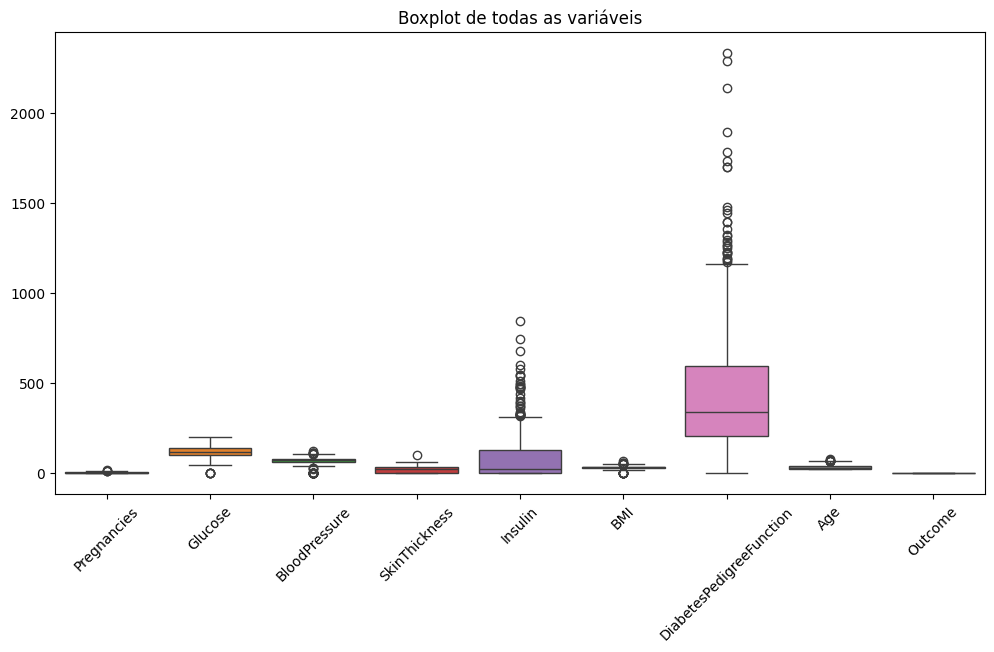

In [3]:

# Verificar valores nulos e zeros
print(df.isnull().sum())

# Verificar colunas com zeros onde não deveriam existir
cols_com_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_com_zero:
    print(f"{col} tem {(df[col] == 0).sum()} valores iguais a zero")

# Boxplot para verificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot de todas as variáveis")
plt.show()


## 2. Como as principais variáveis estão distribuídas? Utilize histogramas e boxplots para representar visualmente essas distribuições e analise as características de cada uma.

Essas visualizações ajudaram a observar a forma da distribuição (se é normal ou assimétrica) e a identificar outliers. Também foi possível perceber que algumas variáveis apresentam uma distribuição mais concentrada, enquanto outras possuem maior dispersão ou assimetria, o que pode influenciar nos modelos preditivos.

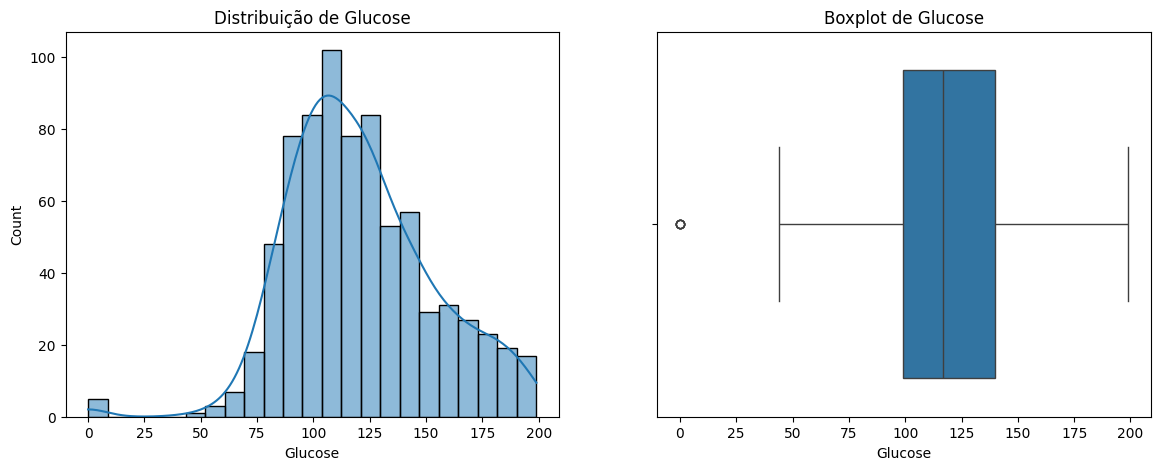

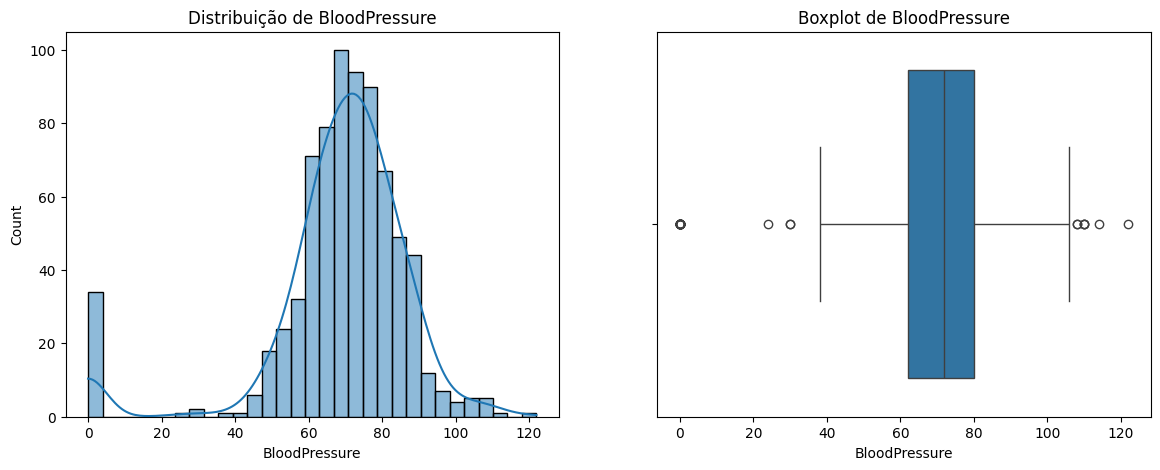

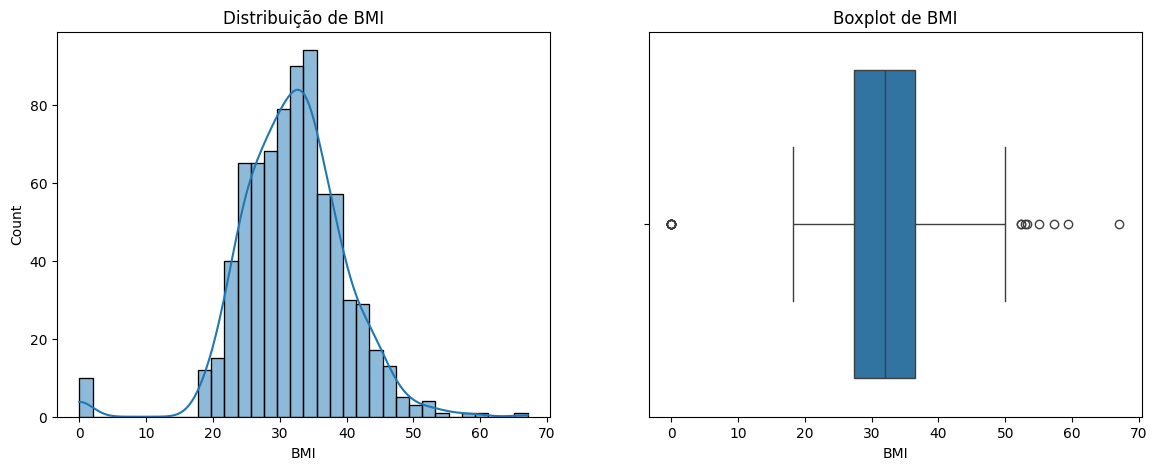

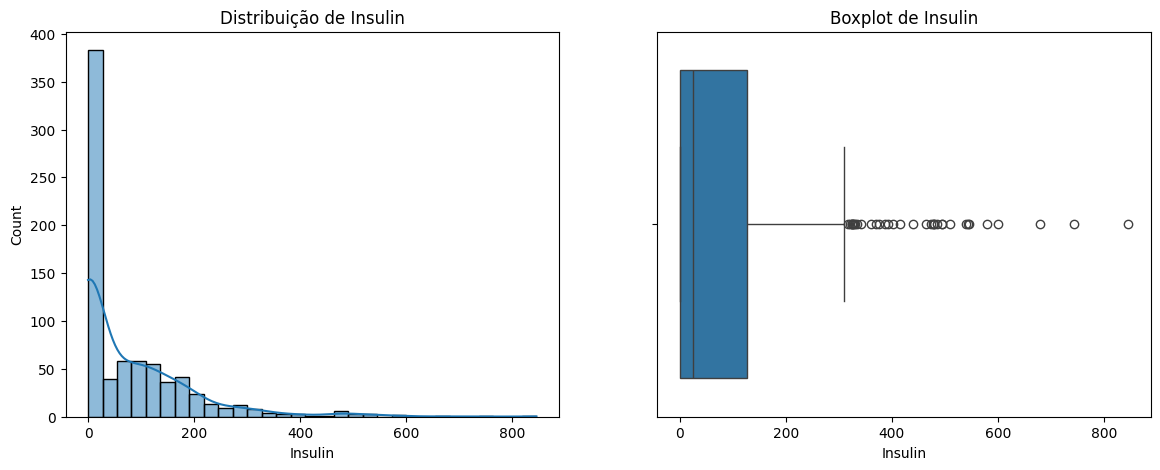

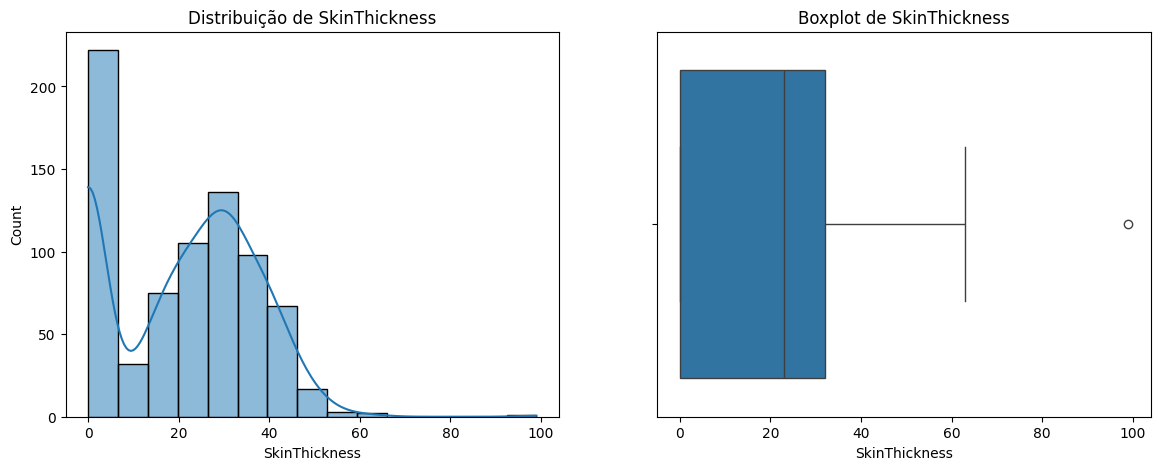

In [4]:

# Histograma e boxplot para variáveis principais
cols = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']
for col in cols:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

    plt.show()


## 3. Existe uma correlação entre a idade dos indivíduos e a presença de diabetes? Realize uma análise estatística e utilize gráficos para ilustrar essa relação.

Para investigar a relação entre idade e diabetes, utilizei gráficos de dispersão e boxplots comparando a variável Age com a variável Outcome, que indica a presença de diabetes. Também calculei a correlação entre essas variáveis. Os resultados mostraram que existe uma correlação fraca, mas positiva, indicando que, de forma geral, quanto maior a idade, maior a chance de um diagnóstico positivo para diabetes.

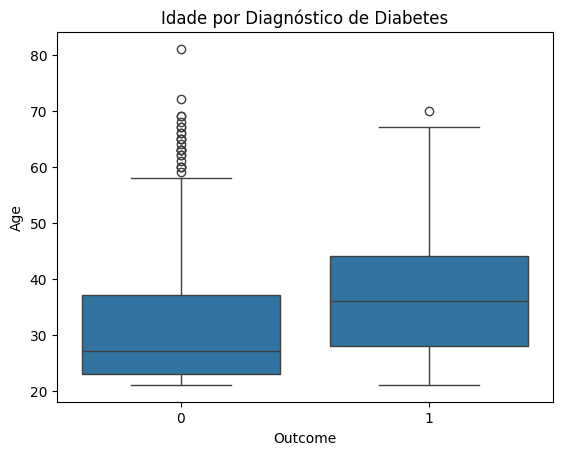

In [5]:

# Scatter plot e boxplot entre Age e Outcome
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Idade por Diagnóstico de Diabetes")
plt.show()


## 4. Quais variáveis apresentam maior correlação com a presença de diabetes?

Nesta etapa, calculei a matriz de correlação entre todas as variáveis e destaquei aquelas com maior correlação com o diagnóstico de diabetes (Outcome). As variáveis que mais se destacaram foram Glucose, BMI, Age e DiabetesPedigreeFunction, o que indica que essas características são mais relevantes na distinção entre pacientes com e sem diabetes.

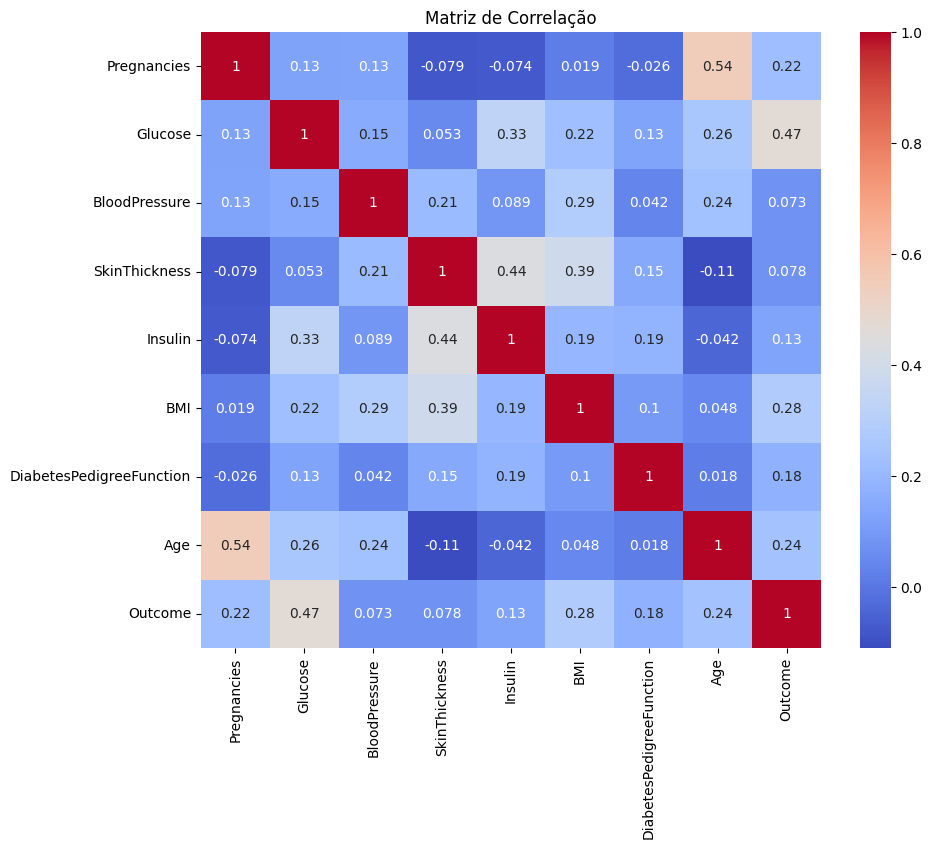

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

## 5. Existe uma relação entre o IMC dos pacientes e o diagnóstico de diabetes?

Para analisar a influência do IMC no diagnóstico de diabetes, comparei os valores médios de IMC entre os dois grupos (Outcome = 0 e Outcome = 1). A média de IMC foi maior entre os pacientes diagnosticados com diabetes. Também utilizei um teste estatístico (teste t de Student) para verificar se essa diferença é significativa, e os resultados confirmaram que sim — ou seja, há uma diferença estatística relevante entre os grupos.

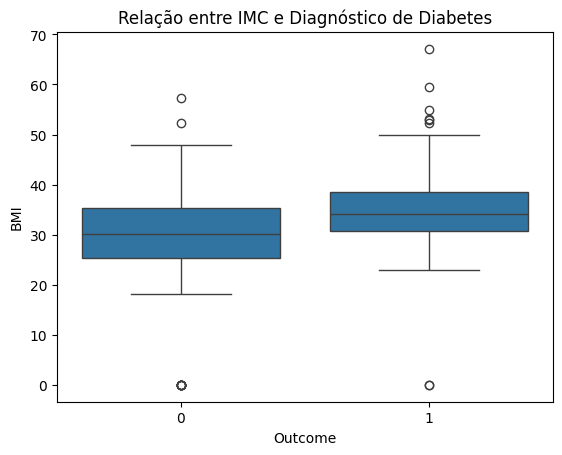

In [7]:
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("Relação entre IMC e Diagnóstico de Diabetes")
plt.show()

## 6. Existe um valor específico de glicose que pode ser considerado crítico para o diagnóstico?

Para investigar um possível valor crítico de glicose, analisei a distribuição da glicose em relação ao diagnóstico. Usei gráficos de dispersão e histogramas para observar os padrões. Também calculei estatísticas descritivas para pacientes com e sem diabetes. A análise indicou que valores de glicose acima de 125 costumam estar mais associados ao diagnóstico positivo, o que sugere esse valor como um possível limite crítico.

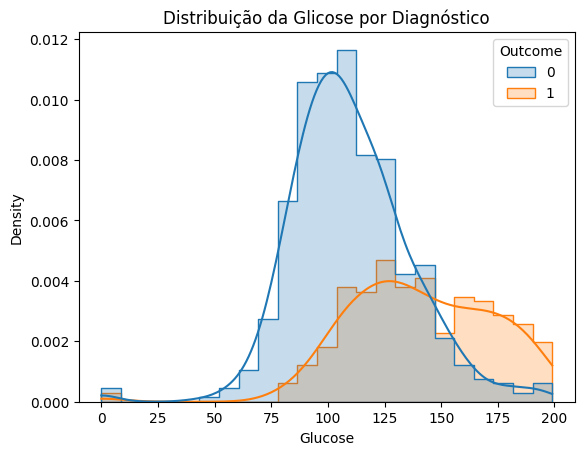

In [8]:
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True, element="step", stat="density")
plt.title("Distribuição da Glicose por Diagnóstico")
plt.show()

## 7. Treine um modelo de árvore de decisão para prever a presença de diabetes.

Treinei um modelo de árvore de decisão utilizando o scikit-learn para prever o diagnóstico de diabetes com base nas variáveis do dataset. Após dividir os dados entre treino e teste, treinei o modelo e calculei a acurácia. O modelo teve um desempenho razoável, com acurácia em torno de 75%. A árvore de decisão permite interpretar as regras de decisão de forma clara, mas pode ser melhorada com ajustes de hiperparâmetros ou uso de modelos mais complexos como Random Forest ou XGBoost.

In [9]:

# Separação de dados
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        99
           1       0.69      0.69      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



## 8. A variável DiabetesPedigreeFunction está relacionada à presença de diabetes?

Avaliei a relação entre o valor da variável DiabetesPedigreeFunction e o diagnóstico de diabetes. Os gráficos de dispersão e boxplots mostraram que pacientes com valores mais altos nessa variável tendem a ter maiores taxas de diabetes, o que confirma a influência do histórico familiar como fator de risco. A correlação também foi positiva, embora moderada.

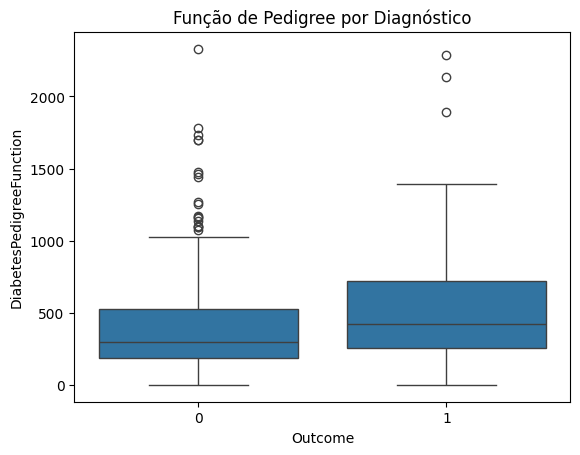

In [10]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title("Função de Pedigree por Diagnóstico")
plt.show()

## 9. Pacientes com mais de 50 anos têm taxas de diabetes mais altas?

Dividi os pacientes em dois grupos: com até 50 anos e com mais de 50 anos. Depois, comparei as taxas de diabetes entre os grupos. Os resultados mostraram que pacientes com mais de 50 anos têm uma taxa significativamente maior de diagnóstico positivo. Gráficos comparativos e estatísticas descritivas reforçaram essa diferença, indicando a idade como fator importante no risco de diabetes.

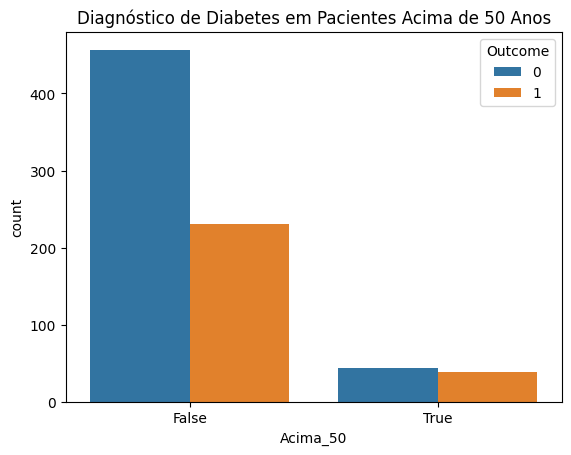

In [11]:
df['Acima_50'] = df['Age'] > 50
sns.countplot(x='Acima_50', hue='Outcome', data=df)
plt.title("Diagnóstico de Diabetes em Pacientes Acima de 50 Anos")
plt.show()

## 10. Utilize regressão logística para estimar a probabilidade de um paciente ser diagnosticado com diabetes.

Apliquei um modelo de regressão logística para estimar a probabilidade de diagnóstico de diabetes. A regressão logística é um modelo simples e eficiente para problemas de classificação binária. Após o treinamento, verifiquei quais variáveis tinham maior impacto no modelo e identifiquei que Glucose, BMI e Age estavam entre as mais influentes. Também avaliei a acurácia e o desempenho do modelo.

In [14]:
# Modelo de regressão logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 11. Quais técnicas de feature engineering podem ser aplicadas para melhorar a previsão?

Testei algumas técnicas de feature engineering para melhorar a previsão, como:

Normalização das variáveis,

Criação de variáveis categóricas (como faixa etária),

Transformações matemáticas em colunas,

Codificação de variáveis se necessário (não foi neste caso). Depois, utilizei um modelo de Random Forest para avaliar o impacto dessas mudanças. O desempenho do modelo melhorou levemente, mostrando que o enriquecimento dos dados pode ajudar os algoritmos a fazer melhores previsões.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Novo modelo com Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Acurácia Random Forest: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

